In [3]:
from py2neo import Graph
from neo4j import GraphDatabase
import networkx as nx

neo_host = "neo4j"
neo_port = 7687

graph = Graph(f"bolt://{neo_host}:{neo_port}")
driver = GraphDatabase.driver(f'bolt://{neo_host}:{neo_port}')

In [ ]:
NB_SELECTED = 4

graph.run("""MATCH ()-[r:Dissed]->(target)
                RETURN target, count(r) AS num
                ORDER BY num DESC
                LIMIT $nb_selected
            """, parameters={"nb_selected": NB_SELECTED}).to_data_frame()[['target']]

In [ ]:
NB_SELECTED = 4

graph.run("""MATCH (artist)-[r:Dissed]->()
                RETURN artist, count(r) AS num
                ORDER BY num DESC
                LIMIT $nb_selected
            """, parameters={"nb_selected": NB_SELECTED}).to_data_frame()[['artist']]

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14036\2011627608.py:9: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_node(node.id, labels=node._labels, properties=node._properties)
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14036\2011627608.py:13: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_edge(rel.start_node.id, rel.end_node.id, key=rel.id, type=rel.type, properties=rel._properties)


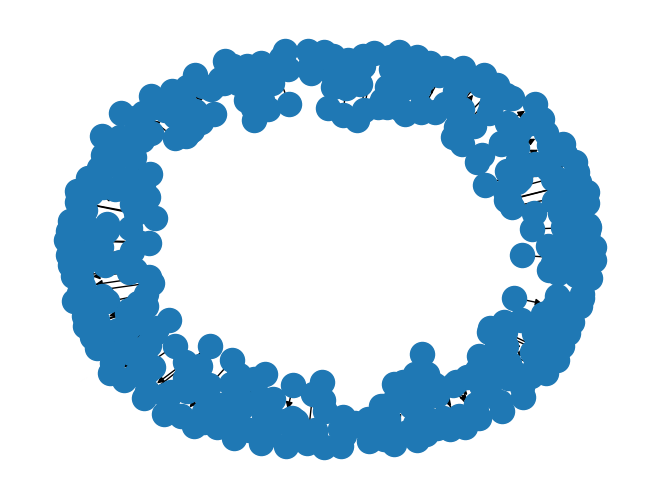

In [6]:
results = driver.session().run("""MATCH (artist)-[r:Dissed]->(target)
                RETURN *
            """)

G = nx.MultiDiGraph()

nodes = list(results.graph()._nodes.values())
for node in nodes:
    G.add_node(node.id, labels=node._labels, properties=node._properties)

rels = list(results.graph()._relationships.values())
for rel in rels:
    G.add_edge(rel.start_node.id, rel.end_node.id, key=rel.id, type=rel.type, properties=rel._properties)
nx.draw(G)